### Useful Libraries

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
# Load the dataset
groceries = pd.read_csv("../input/groceries-dataset/Groceries_dataset.csv")

In [ ]:
groceries.shape

In [ ]:
groceries.head()

In [ ]:
# Get all the transactions as a list of lists
all_transactions = [transaction[1]['itemDescription'].tolist() for transaction in list(groceries.groupby(['Member_number', 'Date']))]

In [ ]:
# First 21st transactions in the transactional dataset
len(all_transactions)

# Data Preparation

We need to transform the data into the following format, which is suitable to perform our association rules.  
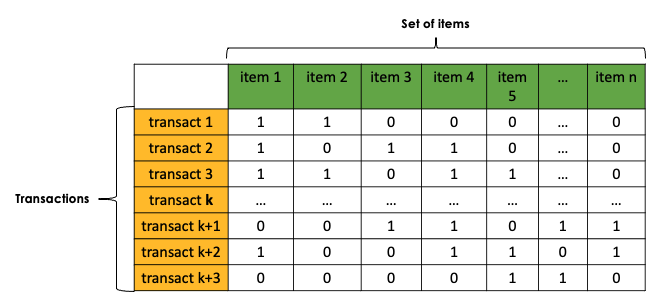

In [ ]:
# Look at the 10 first transactions
all_transactions[0:10]

The Ones and Zeros in the matrix are boolean values, they could also be respectively replaced by True and False, where: 
* **True** means that the item exists in the transaction   
* **False** means it does not  

In [ ]:
# The following instructions transform the dataset into the required format 
trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [ ]:
trans_encoder_matrix.head()

**Find Frequent itemsets**

In [ ]:
frequent_itemsets = fpgrowth(trans_encoder_matrix, min_support=0.001, use_colnames=True)

In [ ]:
frequent_itemsets

**Generate Rules**

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.02)

In [ ]:
rules

* **support** tells how popular an item is based on the proportion of all transactions that are included. The popularity is met if it corresponds to the user-specified support thresold. For instance, a support threshold set to 0.2 (20%) means that the user wants all the items that occur together in at least 20% of all transactions.  
* A High support thresold does not give much more item combination, so reducing the value might be helpful to see much more item combinations for marketing purpose.

### Helper Functions

In [ ]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):
    
    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True, low_memory=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    return total_execution


In [ ]:
n_range = range(1, 10, 1)
list_time_ap = []
list_time_fp = []
for n in n_range:
    time_ap = 0
    time_fp = 0
    min_sup = float(n/100)
    time_ap = perform_rule_calculation(trans_encoder_matrix, rule_type="fpgrowth", min_support=min_sup)
    time_fp = perform_rule_calculation(trans_encoder_matrix, rule_type="aprior", min_support=min_sup)
    list_time_ap.append(time_ap)
    list_time_fp.append(time_fp)

In [ ]:
list_time_ap

**Compare Apriori vs Fp_growth**

In [ ]:
import matplotlib.pyplot as plt

plt.plot(n_range, list_time_ap, label='Apriori', color='green')
plt.plot(n_range, list_time_fp, label='Fp_growth', color='red')
plt.xlabel("Support (%)")
plt.ylabel("Run Time (seconds)")
plt.legend(loc="best")
plt.show()
